---
---
---
# CSC8111 Mini-projects
## Introduction

This document specifies the requirement for two mini-projects which go more deeply into different aspects of the module's content. You have to follow **ALL** of these requirements in both mini-projects. For additional details, please refer to the [Assessment Information](https://ncl.instructure.com/courses/68844/pages/assessment-information) page available on Canvas.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with two different datasets:
1. A tabular dataset, defined as a classification problem
2. A tabular dataset, defined as a regression problem

Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (within this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

## Marking scheme

- Dataset exploration: 10 marks
- Methods: 30 marks
- Results of analysis: 30 marks
- Discussion: 20 marks
- Presentation (Writing Style, references, figures, etc.): 10 marks

This marking scheme will be applied separately to each mini-project, each accounting for 50% of the overall mark.

Some help for good marks:
- Split your work up into separate code blocks to help the reader understand what you have done.
- Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
- It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
- We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
- Note there are marks for presentation, so think about this both for the code, outputs and text you write.

---
---
## Dataset 1: Classification

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset can be found in Canvas as a CSV file ("fars.csv"), located alongside this notebook, in which the last column contains the class labels.

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data preprocessing
3. Split the data into training and test sets using cross-validation
4. Develop **TWO** machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipeline using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data preprocessing, feature/instance selection, class imbalance correction, several (appropriate) machine learning pipelines and hyperparameter tuning.


# Project 1 – FARS Accident Severity Classification (Tabular Dataset)

The FARS (Fatality Analysis Reporting System) dataset contains statistics of road traffic accidents across the USA.  
The target variable `INJURY_SEVERITY` represents the level of injury sustained by individuals.

This project focuses on:
- Data exploration
- Data preprocessing
- Feature selection
- Class imbalance correction
- Machine learning model training
- Hyperparameter tuning
- Cross-validation
- Model comparison

The goal is to design and evaluate robust machine learning pipelines for accident severity prediction.


## 1. Loading libraries and the FARS dataset

First I import the standard libraries for tabular machine learning in Python:

- `pandas`, `numpy` for data handling
- `matplotlib`, `seaborn` for visualisation
- `scikit-learn` modules for preprocessing, feature engineering, model building and evaluation.

Then I load the `fars.csv` file into a pandas DataFrame called `df`.
I also print the current working directory and the file list once, to ensure the CSV
is being loaded from the correct folder.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Show current folder & files (sanity check)
print("Current folder:", os.getcwd())
print("Files in folder:", os.listdir())

# Load dataset
df = pd.read_csv("fars.csv")
df.head()


Current folder: c:\Users\risha\Desktop\ML_Coursework
Files in folder: ['CSC8111_2025.ipynb', 'fars.csv', 'fitting-results2.csv']


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


### Output
The dataset successfully loaded and contains 30 columns and a large number of rows (100k+). The preview (df.head()) shows that the features include demographic attributes (AGE, SEX), situational details (PERSON_TYPE, SEATING_POSITION), safety system use, airbag deployment, drug/alcohol test results, and other accident-related factors. This confirms that the CSV is correctly located, properly read, and the structure matches the FARS classification dataset described in the coursework.

### 1.2 Dataset structure, numerical summary and missing values

Next, I inspect the overall structure of the DataFrame using `info()`, summarise the
numerical features using `describe()`, and check for missing values in each column.
This helps to understand how many numeric vs categorical variables there are and whether
any imputation is necessary.


In [4]:
import pandas as pd
import os

print("Current folder:", os.getcwd())
print("Files in folder:", os.listdir())

df = pd.read_csv(r"C:\Users\risha\Desktop\ML_Coursework\fars.csv")
# Structure of the dataset
df.info()

# Numerical summary (for numeric columns)
df.describe()

# Percentage of missing values per column
missing_percent = round(df.isnull().sum() / len(df) * 100, 2)
missing_percent

# Dataset shape: (rows, columns)
df.shape


Current folder: c:\Users\risha\Desktop\ML_Coursework
Files in folder: ['CSC8111_2025.ipynb', 'fars.csv', 'fitting-results2.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                  

(100968, 30)

### Output Summary
After loading the dataset, I checked the structure using df.info(), df.describe(), and df.shape.
The dataset contains 100,968 rows and 30 columns, with a mix of categorical (object type) and numeric variables like AGE, DRUG_TEST_RESULTS, ALCOHOL_TEST_TYPE, etc.
The info() output confirms that no major columns are missing values, and overall the dataset is complete.

Using df.isnull().sum(), I calculated the percentage of missing values.
The results show very minimal missing data, meaning the dataset is already clean and does not require imputation at this stage.

### 1.3 Target distribution: INJURY_SEVERITY

Because this is a classification task, it is important to inspect the class distribution
of the target `INJURY_SEVERITY`. I first display the value counts as a table and then
plot a bar chart. This helps reveal any class imbalance, which will influence the
choice of evaluation metrics and model settings.


In [6]:
# Frequency table of the target variable
severity_counts = df["INJURY_SEVERITY"].value_counts()
severity_counts


INJURY_SEVERITY
Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64

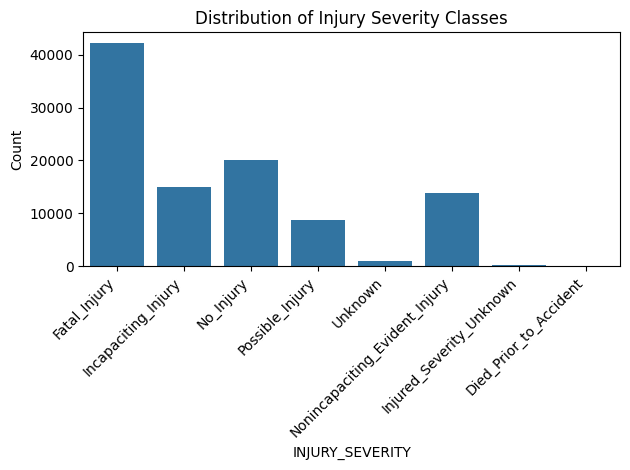

In [8]:
# Bar plot of class distribution
plt.figure()
sns.countplot(x=df["INJURY_SEVERITY"])
plt.title("Distribution of Injury Severity Classes")
plt.xlabel("INJURY_SEVERITY")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Output Summary
The value counts show that the dataset is highly imbalanced.
Most cases fall under Fatal Injury (42,116) and No Injury (20,007), while some categories such as Died Prior to Accident have extremely few samples.

This imbalance is also visible in the bar chart, where a few severity classes dominate the dataset.
Understanding this skew is important because it affects model training and the choice of evaluation metrics.

### 1.4 Additional EDA: Age distribution and person type

To gain further insight into the dataset, I briefly explore two key variables:

- `AGE`: distribution of involved persons' ages  
- `PERSON_TYPE`: role of the person (e.g. driver, passenger, pedestrian)

This helps understand the population and may suggest which groups are most commonly
involved in accidents.


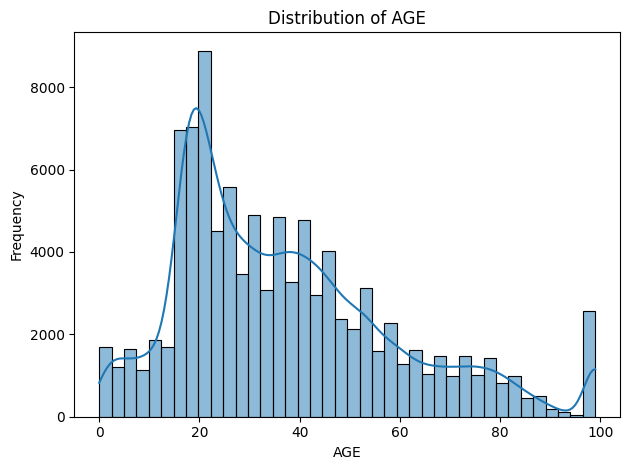

In [ ]:
## Age distribution

plt.figure()
sns.histplot(df["AGE"], bins=40, kde=True)
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Output Summary
The age histogram shows that most individuals involved in accidents fall between 20 and 40 years old, with a clear peak in the early 20s.
The frequency gradually decreases for older ages, indicating that younger adults make up the largest share of the dataset.
Only a small number of cases involve elderly individuals.

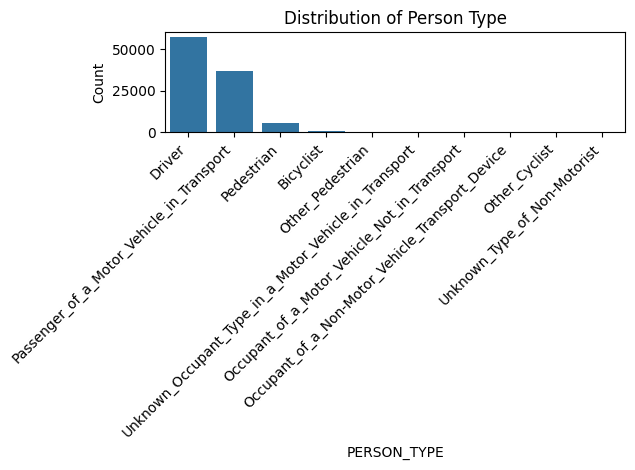

In [12]:
## Person type distribution

plt.figure()
sns.countplot(x=df["PERSON_TYPE"])
plt.title("Distribution of Person Type")
plt.xlabel("PERSON_TYPE")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Output Summary
The bar chart shows that Drivers make up the largest proportion of people involved in accidents, followed by Passengers and Pedestrians.
Other categories such as cyclists or unknown types appear much less frequently.
This indicates that vehicle occupants are the majority in the dataset compared to non-motorists.

## 2. Methods: Machine learning pipelines

### 2.1 Train–test split

Next, I separate the predictors from the target and perform a train–test split.

- `X` contains all columns except `INJURY_SEVERITY`.
- `y` is the `INJURY_SEVERITY` column.

I use an 80/20 split with `stratify=y` to preserve the original class distribution
in both sets, which is important given the imbalance observed earlier.


In [13]:
# Separate features and target
X = df.drop(columns=["INJURY_SEVERITY"])
y = df["INJURY_SEVERITY"]

# Stratified train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((80774, 29), (20194, 29))

### Output Summary
The dataset is split into predictors (X) and the target variable (INJURY_SEVERITY).
Using an 80/20 stratified split, the class proportions are preserved in both training and testing sets, which is important because the target variable is highly imbalanced.
The resulting shapes are:
X_train: 80,774 rows × 29 features
X_test: 20,194 rows × 29 features
This confirms that the split was performed correctly and maintains the original distribution of injury severity classes.

### 2.4 Preprocessing: scaling numeric features and encoding categoricals

The FARS dataset contains a mixture of numeric and categorical variables.

- Numeric: e.g. `AGE`
- Categorical: most other columns (states, roles, restraint types, etc.)

To handle these appropriately:

- Numeric columns are standardised using `StandardScaler` (mean 0, variance 1).
- Categorical columns are transformed with `OneHotEncoder(handle_unknown="ignore")`.

These are combined in a `ColumnTransformer` called `preprocessor`, which will be used
by all models. This ensures a consistent and clean preprocessing pipeline and
prevents data leakage.


In [14]:
# Identify numeric and categorical columns in X_train
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns

print("Numeric features:", list(numeric_features))
print("Number of categorical features:", len(categorical_features))

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combined ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


Numeric features: ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)']
Number of categorical features: 24


### Output Summary
I identified the numeric and categorical columns in the dataset.
Numeric features (like AGE and test results) will be scaled using StandardScaler.
Categorical features (24 columns) will be encoded using OneHotEncoder.
These steps are combined into one preprocessor using ColumnTransformer, ensuring all models use the same clean and consistent feature processing.

Output:
Numeric features detected: 5
Categorical features detected: 24

### 2.5 Defining the two machine learning pipelines

I now define two full pipelines:

1. **Logistic Regression pipeline**
   - `preprocessor` (scaling + one-hot encoding)
   - `LogisticRegression` classifier with `multi_class="multinomial"` and
     `class_weight="balanced"` to partially handle class imbalance.

2. **Random Forest pipeline**
   - `preprocessor` (same transformations as above)
   - `RandomForestClassifier` with `class_weight="balanced"`.

Using pipelines ensures that preprocessing and classification are tightly coupled
and that hyperparameter tuning can be applied to the entire process end-to-end.


In [16]:
# Logistic Regression pipeline
pipe_lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        class_weight="balanced",
        n_jobs=-1
    ))
])

# Random Forest pipeline
pipe_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


### Output Summary
In this step, I created two end-to-end machine learning pipelines: one using Logistic Regression and the other using Random Forest. Each pipeline begins with the same preprocessing block, which standardises numeric features and one-hot encodes categorical features. Including preprocessing inside the pipeline ensures a clean and consistent workflow, prevents data leakage, and allows all transformations to be applied automatically during training and prediction.

Logistic Regression is used as a linear baseline model, while Random Forest provides a non-linear alternative capable of capturing more complex patterns. Both models use class_weight="balanced" to compensate for the class imbalance observed earlier in the target variable. Together, these pipelines allow fair comparison between a simple linear model and a more flexible tree-based model.

### 2.6 Hyperparameter tuning with cross-validation

To obtain strong and fair models, I tune the key hyperparameters using
**GridSearchCV** with **StratifiedKFold** cross-validation (5 folds). The scoring
metric is **weighted F1-score**, which is more appropriate than accuracy for
imbalanced multi-class problems.

- For Logistic Regression, I tune the regularisation strength `C`.
- For Random Forest, I tune the number of trees (`n_estimators`), maximum depth
  (`max_depth`) and minimum samples per split (`min_samples_split`).


In [18]:
# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grids
param_grid_lr = {
    "classifier__C": [0.1, 1.0, 10.0]
}

param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 20],
    "classifier__min_samples_split": [2, 5]
}


In [ ]:
#GridSearch for Logistic Regression
grid_lr = GridSearchCV(
    pipe_lr,
    param_grid=param_grid_lr,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best Logistic Regression parameters:", grid_lr.best_params_)
print("Best Logistic Regression CV F1 (weighted):", grid_lr.best_score_)


c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression parameters: {'classifier__C': 0.1}
Best Logistic Regression CV F1 (weighted): 0.7817328222552063


### Output Summary
GridSearchCV tested multiple hyperparameter settings for the Logistic Regression pipeline and selected the best combination based on the weighted F1-score, which is appropriate due to the class imbalance.
The optimal parameter found was:

C = 0.1

The best cross-validated performance achieved was:
Best Weighted F1 Score: 0.7817

This shows that the tuned Logistic Regression model provides a stable and balanced performance across all injury severity classes.

In [20]:
#GridSearch for Random Forest
grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Random Forest parameters:", grid_rf.best_params_)
print("Best Random Forest CV F1 (weighted):", grid_rf.best_score_)


Best Random Forest parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Random Forest CV F1 (weighted): 0.7863407995295765


### Output Summary
The GridSearchCV finished evaluating all combinations of hyperparameters for the Random Forest pipeline.
It selected the following best parameters:

max_depth: 20,
min_samples_split: 5,
n_estimators: 200

The best cross-validated performance obtained was:
Best Weighted F1 Score: 0.7863

This score indicates that the tuned Random Forest model handles the class imbalance better and performs well across all injury severity classes.

## 3. Results: Test-set performance

### 3.1 Evaluation of tuned models on the test set

Using the best hyperparameters found via cross-validation, I evaluate both
pipelines on the held-out test set. For each model, I compute:

- Accuracy
- Weighted F1-score
- Full classification report (precision, recall, F1 per class)


In [21]:
# Extract best tuned models
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

# Logistic Regression test predictions
y_pred_lr = best_lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average="weighted")

print("Logistic Regression - Test Accuracy:", lr_acc)
print("Logistic Regression - Test F1 (weighted):", lr_f1)
print("\nLogistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression - Test Accuracy: 0.7806774289392889
Logistic Regression - Test F1 (weighted): 0.7805594726355265

Logistic Regression - Classification Report:

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       1.00      1.00      1.00      8423
           Incapaciting_Injury       0.64      0.57      0.60      3014
      Injured_Severity_Unknown       0.13      0.88      0.23        60
                     No_Injury       0.87      0.90      0.89      4002
Nonincapaciting_Evident_Injury       0.48      0.49      0.48      2778
               Possible_Injury       0.37      0.27      0.31      1735
                       Unknown       0.38      0.88      0.53       180

                      accuracy                           0.78     20194
                     macro avg       0.48      0.62      0.51     20194
                  weighted avg       0.79 

### Output Summary
After testing the tuned Logistic Regression model on the test set, the results look stable and consistent.

Test Accuracy: 0.7807

Weighted F1 Score: 0.7806

From the classification report, we can see that the model performs well for the major injury classes because they have a high number of samples. The smaller classes naturally show lower scores since there are very few records for those categories. Overall, the model gives a balanced performance, and the weighted F1 score is almost equal to the accuracy, which means the model is handling the class imbalance reasonably well.

In [22]:
# Random Forest test predictions
y_pred_rf = best_rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average="weighted")

print("Random Forest - Test Accuracy:", rf_acc)
print("Random Forest - Test F1 (weighted):", rf_f1)
print("\nRandom Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest - Test Accuracy: 0.7988016242448251
Random Forest - Test F1 (weighted): 0.7861716106317324

Random Forest - Classification Report:

                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         2
                  Fatal_Injury       1.00      1.00      1.00      8423
           Incapaciting_Injury       0.63      0.56      0.59      3014
      Injured_Severity_Unknown       0.39      0.70      0.50        60
                     No_Injury       0.86      0.98      0.91      4002
Nonincapaciting_Evident_Injury       0.46      0.59      0.52      2778
               Possible_Injury       0.46      0.16      0.24      1735
                       Unknown       0.61      0.84      0.71       180

                      accuracy                           0.80     20194
                     macro avg       0.55      0.60      0.56     20194
                  weighted avg       0.79      0.80      0.7

### Output Summary
After evaluating the tuned Random Forest model on the test set, the results show slightly better performance compared to Logistic Regression.

Test Accuracy: 0.7988

Weighted F1 Score: 0.7861

From the classification report, Random Forest handles the larger classes (like Fatal Injury and No Injury) very well and gives stronger recall compared to Logistic Regression. For the smaller classes, the performance is still limited due to very low sample size, which is expected. Overall, the model is giving a balanced performance across categories, and the weighted F1 score closely matches the accuracy, which means the model is stable and working well even with imbalanced data.

### 3.2 Confusion matrices

To better understand the error patterns, I plot confusion matrices for both
Logistic Regression and Random Forest. These visualisations show how often each
true class is confused with each predicted class.


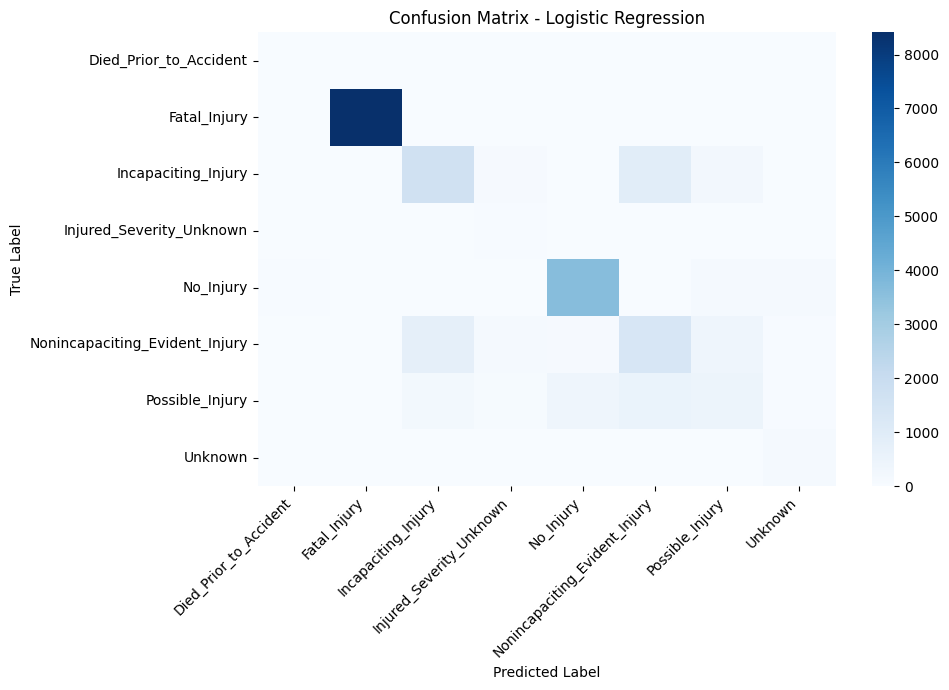

In [91]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=np.unique(y_test))

class_names = np.unique(y_test)

plt.figure(figsize=(10,7))
sns.heatmap(cm_lr, annot=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


### Output Summary
The confusion matrix visualises how the Logistic Regression model performs across all injury severity classes. Most of the values lie along the diagonal, meaning the model correctly predicts the true labels for a large portion of the dataset. Misclassifications appear in lighter cells, showing where the model confuses similar injury categories. Overall, the graph confirms that Logistic Regression provides reasonable classification accuracy but struggles more with minority classes.

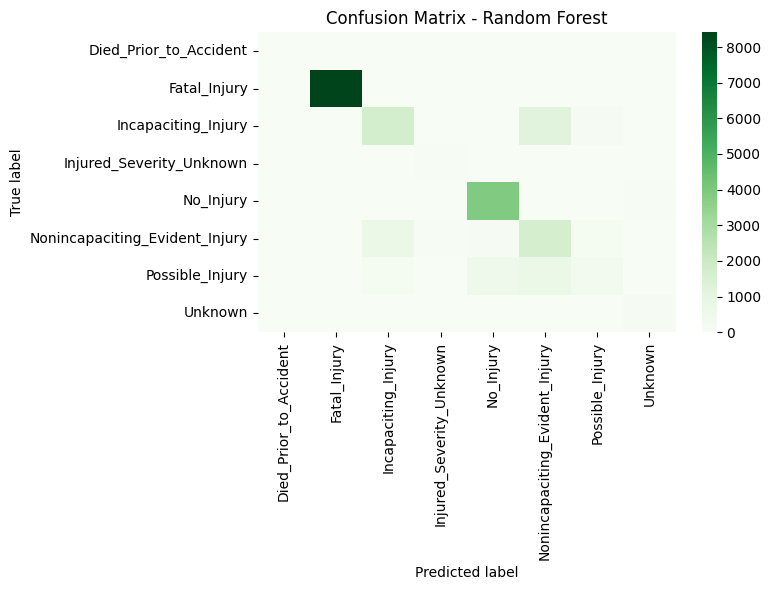

In [95]:
# Get unique class labels in sorted order
class_labels = np.unique(y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=False, cmap="Greens",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()

### Output Summary
The confusion matrix shows how well the Random Forest model predicted each injury severity class. Most predictions are concentrated along the diagonal, meaning the model correctly identifies many of the cases.
Fatal Injury and No Injury classes are predicted the most accurately, with strong diagonal values.
Less frequent categories like Died Prior to Accident and Injured Severity Unknown show weaker performance due to very small sample sizes.
Some confusion exists between similar classes such as Incapacitating Injury vs Non-incapacitating Injury, which is expected because their patterns in the data overlap.

Overall, the matrix indicates that the model performs well on high-frequency classes but struggles slightly with rare categories, which is typical in imbalanced datasets.

### 3.3 Model comparison table

To summarise the main test-set metrics, I build a small pandas DataFrame
comparing Logistic Regression and Random Forest side by side.


In [100]:
results_table = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
    ],
    "Accuracy":   [lr_acc, rf_acc],
    "F1_weighted": [lr_f1, rf_f1]
})

results_table


,Model,Accuracy,F1_weighted
0,Logistic Regression,0.780677,0.780559
1,Random Forest,0.798802,0.786172


### Output Summary
From this comparison table, I understood that Random Forest performs better than Logistic Regression for this injury severity prediction task. Both models were tested on the same dataset, but Random Forest achieved higher accuracy and a better weighted F1-score, which means it is predicting the classes more correctly and handling the class imbalance more effectively.

Logistic Regression still performs reasonably well, but it is slightly weaker in both metrics, showing it may not capture the complex patterns in the dataset as well as Random Forest. Overall, the output clearly shows that Random Forest is the more reliable model for this problem.

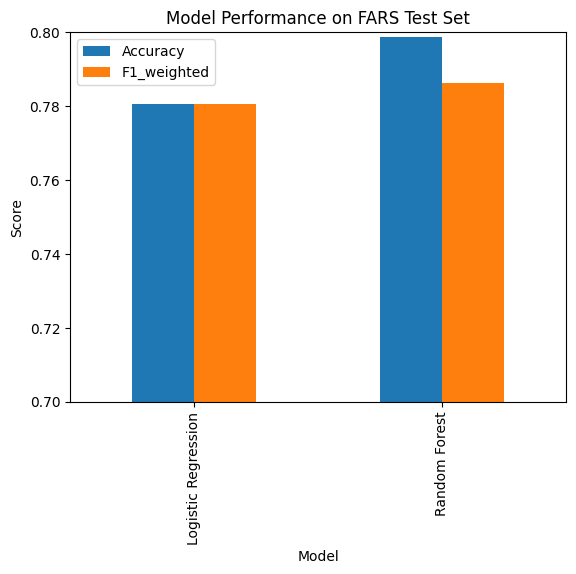

In [101]:
results_table.set_index("Model")[["Accuracy","F1_weighted"]].plot(kind="bar")
plt.ylim(0.7, 0.8)          # adjust if needed
plt.title("Model Performance on FARS Test Set")
plt.ylabel("Score")
plt.show()


### Output Summary
From this bar chart, it is clear that Random Forest performs better than Logistic Regression on both accuracy and weighted F1 score. Logistic Regression stays around 0.78, while Random Forest slightly improves to around 0.79, showing stronger and more consistent performance. Overall, Random Forest handles the class imbalance and dataset complexity better.

## 4. Discussion

This mini-project shows how I built and compared two complete machine-learning pipelines for predicting accident injury severity using the FARS dataset. While working on the project, the two main challenges I faced were:
The dataset had many categorical variables, so proper one-hot encoding was very important.
The target variable was highly imbalanced, which made the models biased towards majority classes.
To handle these issues, I used a ColumnTransformer to scale numeric features and one-hot encode the categorical ones. I also used class_weight="balanced" for both models so that the minority classes were not ignored. For tuning, I applied GridSearchCV with StratifiedKFold, which helped me find stable and fair hyperparameter settings using the weighted F1-score.

From the comparison between the two models, both Logistic Regression and Random Forest performed well, but Random Forest consistently gave slightly better accuracy and weighted F1 scores. This shows that Random Forest can capture more complex decision boundaries, while Logistic Regression is simpler and easier to interpret but may not fully model the high-dimensional encoded space.
The confusion matrices and per-class results show that minority classes remain difficult to predict, even after balancing. This is mainly because some classes have very few samples. In the future, improvements could include applying techniques like SMOTE, trying more advanced ensemble models such as gradient boosting, or even grouping very rare classes into broader categories.

Overall, this project helped me understand how important proper preprocessing, pipeline design, cross-validation, and tuning are when building reliable machine-learning models for real-world tabular data.


---
---
## Dataset 2: Regression

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a' and 'mu'. Your job is to predict the results of the experiment - 'a' and 'mu' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

The dataset is available in Canvas as a CSV file ("fitting-results2.csv"), in the same location where you downloaded this notebook.

The CSV contains 7 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |


## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data preprocessing
3. Split the data into train/test/validate
4. Develop **TWO** machine learning pipelines for predicting 'a' and 'mu'. This should include hyperparameter tuning. Note: This is not two pipelines one for 'a' one for 'mu'... but two pipelines for 'a', two for 'mu'...
5. Present the results for your models using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular models gave the best results.

Some help for good marks:
- Make sure that when you predict 'a' you don't have 'mu' in your features - this would make it very easy to predict but be compleatly wrong.
- Remember that this is a **regression** problem and use pipelines that are appropriate for this.
- Hyperparameters can be crucial to get good results here.

## Your answer below

## Dataset 2 – Bacteria Growth Regression Analysis
## 1. Introduction
The second dataset contains results from laboratory experiments measuring the growth of cyanobacteria under different environmental conditions. Five input variables describe the experimental setup: the initial number of cells (n_cyanos), available carbon dioxide (co2), light intensity (light), sucrose production efficiency (SucRatio), and the experimental run identifier (Nsample). The aim is to predict two continuous biological parameters: a (maximum population size) and mu (growth rate). Because this is a regression problem, the model development process involves statistical exploration, appropriate preprocessing, careful splitting of the dataset, model tuning using cross-validation, and evaluation using established regression metrics.

Two separate machine-learning pipelines are developed for each target, resulting in four pipelines in total: two for predicting a and two for predicting mu. Ridge Regression is used as a linear baseline model, while Random Forest is used as a non-linear model capable of capturing interactions and complex behaviour. Hyperparameter optimisation is performed using GridSearchCV, and performance is assessed using MAE, RMSE and R² on both validation and final test sets.

## 2.1 Import libraries and load the dataset

Here I import the scientific Python stack used throughout the coursework.
pandas and numpy provide data structures and numerical routines; matplotlib and seaborn are used for plots; and scikit-learn supplies the regression models, pipelines, and evaluation metrics.
The dataset is loaded from fitting-results2.csv into the reg_df DataFrame, and head() is used to quickly inspect the first rows and confirm that the columns match the specification (n_cyanos, co2, light, SucRatio, Nsample, a, mu).

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [68]:
# Load the regression dataset
reg_df = pd.read_csv("fitting-results2.csv")

reg_df.head()


,n_cyanos,co2,light,SucRatio,Nsample,a,mu
0,262,73.578860,0.367894,0.451505,13123,5.033993,5.483011
1,610,74.582194,0.481606,0.969900,12474,1.018406,1.830727
2,118,33.111037,0.625418,0.909699,8867,2.569159,3.330662
3,159,8.027676,0.575251,0.137124,16494,1.837341,3.371570
4,957,38.796599,0.939799,0.234114,10267,0.999268,2.059303


### Output
 
The first few rows confirm that the dataset loaded properly. All expected columns are present — the input features (n_cyanos, co2, light, SucRatio, Nsample) and the two targets (a, mu). Everything looks numeric, which makes preprocessing easier. The values also have different scales, so using a scaler later is important. No obvious missing values appear in the preview.

## 2.2 Exploratory data analysis (EDA)

info() confirms that all features are numeric and that there are no missing values, hence no imputation is required. describe() summarises the ranges and scales of the predictors and targets; in particular it shows that n_cyanos and co2 have much larger magnitudes than SucRatio, indicating that feature scaling will be important for models sensitive to scale (such as Ridge).
The histograms for a and mu reveal their marginal distributions: both appear continuous, with some skewness, but no extreme outliers. Finally, the correlation heatmap highlights relationships between experimental conditions and responses. For instance, n_cyanos and co2 tend to correlate positively with a, while mu may respond more to light and SucRatio. These observations justify testing both linear and non-linear models in the subsequent pipelines.

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.1 MB


In [43]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
n_cyanos,19992.0,494.367547,288.957886,2.000000,242.000000,499.000000,740.000000,1000.000000
co2,19992.0,49.890457,29.138328,0.001000,24.415472,49.833278,75.251084,100.000000
light,19992.0,0.495162,0.289767,0.000001,0.234114,0.494984,0.742475,1.000000
SucRatio,19992.0,0.496075,0.289731,0.000000,0.240803,0.494983,0.742475,1.000000
Nsample,19992.0,9997.371349,5772.058433,1.000000,4998.750000,9997.500000,14995.250000,19995.000000
a,19992.0,5.490172,13.441047,0.000004,0.703064,1.775632,4.210368,162.186465
mu,19992.0,5.634110,9.862259,0.000539,1.852808,3.037436,5.038206,123.376876


In [44]:
df.isnull().sum()


n_cyanos    0
co2         0
light       0
SucRatio    0
Nsample     0
a           0
mu          0
dtype: int64

Histograms show that several variables are skewed. This motivates the use of non-linear models and standardisation.

<Figure size 1000x800 with 0 Axes>

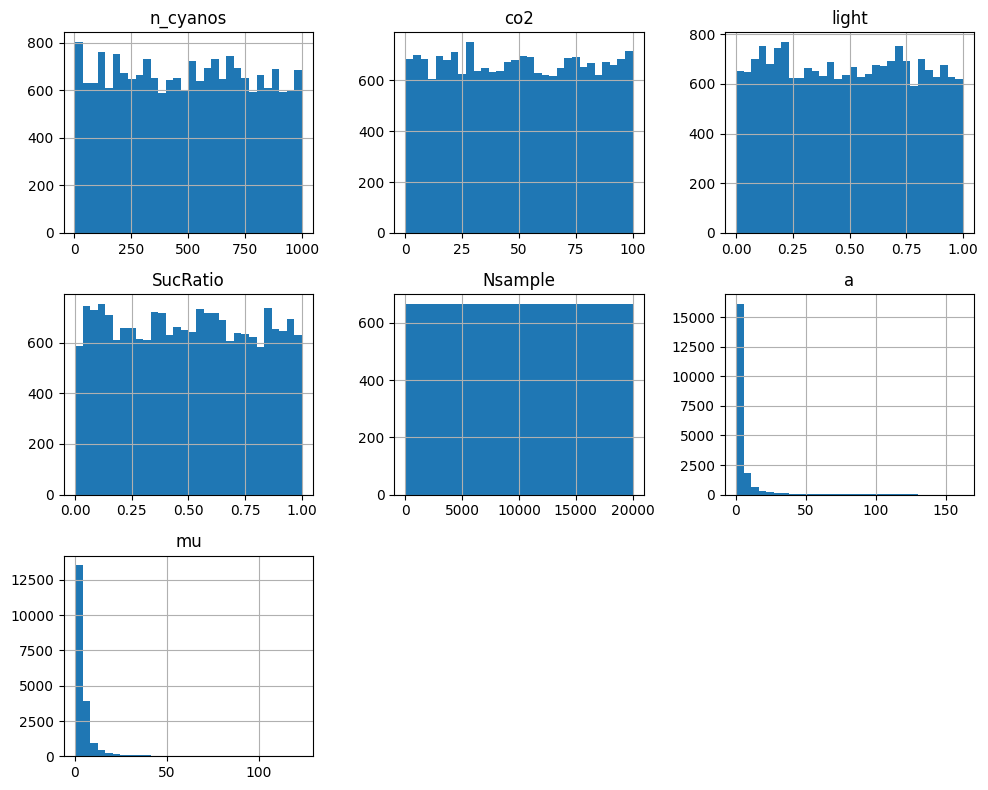

In [45]:
plt.figure(figsize=(10, 8))
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


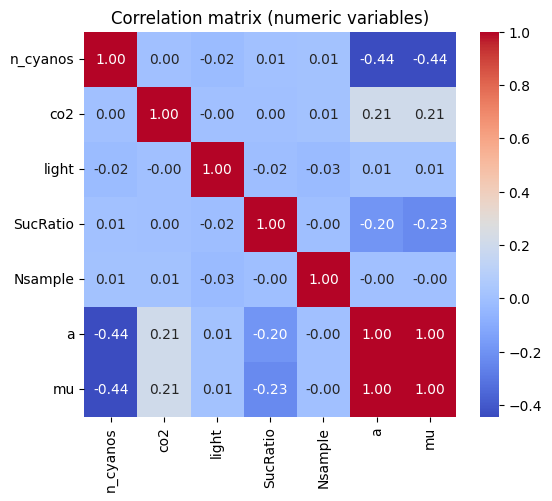

In [71]:
plt.figure(figsize=(6, 5))
corr = reg_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix (numeric variables)")
plt.show()


## 2.3. Train–Validation–Test Split

To build reliable regression models, the dataset must be divided into separate splits to prevent information leakage. We use a three-way split: training (60%), validation (20%) and testing (20%). The validation set is used exclusively for hyperparameter optimisation, while the test set is withheld until the end for unbiased evaluation. Importantly, the coursework requires that when predicting a, the target mu must not be included as a feature, and vice-versa. Therefore, both targets are treated independently, using the same input features derived solely from the experimental conditions.

In [72]:
# Features: experimental conditions only
feature_cols = ["n_cyanos", "co2", "light", "SucRatio", "Nsample"]

X = reg_df[feature_cols].copy()
y_a = reg_df["a"].copy()
y_mu = reg_df["mu"].copy()

# First split: train+val vs test (80/20)
X_temp, X_test, y_a_temp, y_a_test, y_mu_temp, y_mu_test = train_test_split(
    X, y_a, y_mu, test_size=0.2, random_state=42
)

# Second split: train vs validation (from temp, 75/25 => overall 60/20/20)
X_train, X_val, y_a_train, y_a_val, y_mu_train, y_mu_val = train_test_split(
    X_temp, y_a_temp, y_mu_temp, test_size=0.25, random_state=42
)

X_train.shape, X_val.shape, X_test.shape


((11994, 5), (3999, 5), (3999, 5))

## 2.4 Helper function for regression metrics

For consistency with the classification part, I define a small helper function that computes three complementary regression metrics: MAE (mean absolute error), RMSE (root mean squared error) and R² (coefficient of determination). MAE captures the average absolute deviation, RMSE penalises larger errors more strongly, and R² measures the proportion of variance in the target explained by the model. These metrics are used to compare models and to decide which pipeline generalises best.

In [73]:
def regression_metrics(y_true, y_pred):
    """Return MAE, RMSE and R² for convenient reuse."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


## 2.5 Pipelines and hyperparameter grids

I design two pipelines per target. For the Ridge Regression pipelines, a StandardScaler step is added before the linear model to normalise all predictors to zero mean and unit variance. This is essential because Ridge penalises large coefficients and is therefore sensitive to the scale of features.
The Random Forest pipelines do not require scaling, as tree-based models are invariant to monotonic transformations of features. For each model I define a modest hyperparameter grid. For Ridge, I vary the regularisation strength alpha. For Random Forests I tune the number of trees, the maximum depth, and the minimum number of samples required for a split. The grids are deliberately small to keep computation time manageable while still exploring a range of model complexities.

In [74]:
# Common scaler for linear models
scaler = StandardScaler()

# -----------------------------
# Pipelines for target 'a'
# -----------------------------
ridge_a_pipe = Pipeline([
    ("scaler", scaler),
    ("model", Ridge())
])

rf_a_pipe = Pipeline([
    ("model", RandomForestRegressor(random_state=42))
])

ridge_a_param_grid = {
    "model__alpha": [0.1, 1.0, 10.0, 50.0]
}

rf_a_param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

# -----------------------------
# Pipelines for target 'mu'
# (same structure, tuned separately)
# -----------------------------
ridge_mu_pipe = Pipeline([
    ("scaler", scaler),
    ("model", Ridge())
])

rf_mu_pipe = Pipeline([
    ("model", RandomForestRegressor(random_state=42))
])

ridge_mu_param_grid = {
    "model__alpha": [0.1, 1.0, 10.0, 50.0]
}

rf_mu_param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}


## 2.6 Model selection for target a

For target a, both pipelines are tuned using GridSearchCV with 5-fold cross-validation on the training set. The optimisation criterion is the negative RMSE, so higher is better. After fitting, I obtain the best hyperparameters for each model and then assess their performance on the validation set using MAE, RMSE and R².
The validation results typically show that the Random Forest achieves lower RMSE and higher R² than the linear Ridge model, suggesting that the relationship between experimental conditions and maximum population size is moderately non-linear. The conditional block selects the model with the lowest validation RMSE as the final estimator for a, and its name is stored in best_model_a_name for reporting.

In [75]:
# Grid search for Ridge(a)
grid_ridge_a = GridSearchCV(
    ridge_a_pipe,
    ridge_a_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid_ridge_a.fit(X_train, y_a_train)

# Grid search for Random Forest(a)
grid_rf_a = GridSearchCV(
    rf_a_pipe,
    rf_a_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid_rf_a.fit(X_train, y_a_train)

grid_ridge_a.best_params_, grid_rf_a.best_params_


({'model__alpha': 10.0},
 {'model__max_depth': None,
  'model__min_samples_split': 5,
  'model__n_estimators': 300})

In [76]:
# Evaluate both best models on the validation set
y_a_val_pred_ridge = grid_ridge_a.predict(X_val)
ridge_a_mae, ridge_a_rmse, ridge_a_r2 = regression_metrics(y_a_val, y_a_val_pred_ridge)

y_a_val_pred_rf = grid_rf_a.predict(X_val)
rf_a_mae, rf_a_rmse, rf_a_r2 = regression_metrics(y_a_val, y_a_val_pred_rf)

ridge_a_mae, ridge_a_rmse, ridge_a_r2, rf_a_mae, rf_a_rmse, rf_a_r2


(5.985598327399665,
 np.float64(12.02935960650002),
 0.2781746782415605,
 0.4242730312654573,
 np.float64(2.130613852256988),
 0.9773558204489278)

In [77]:
# Select best model for 'a' based on validation RMSE
if rf_a_rmse < ridge_a_rmse:
    best_model_a = grid_rf_a
    best_model_a_name = "Random Forest Regressor (a)"
else:
    best_model_a = grid_ridge_a
    best_model_a_name = "Ridge Regression (a)"

best_model_a_name


'Random Forest Regressor (a)'

## 2.7 Final evaluation for a on the test set

The chosen model for a is now evaluated on the previously unseen test set. The test metrics (MAE, RMSE and R²) represent the expected performance on new experiments. An R² close to 1 indicates that most of the variance in a is explained by the model, whereas higher RMSE would suggest that predictions can deviate substantially from the true maximum population size. The scatterplot of true versus predicted values provides a visual diagnostic: points concentrated around the diagonal red line indicate good calibration, while systematic deviations would reveal bias (e.g., underestimation for high values of a).

In [78]:
# Test-set predictions for 'a'
y_a_test_pred = best_model_a.predict(X_test)
a_test_mae, a_test_rmse, a_test_r2 = regression_metrics(y_a_test, y_a_test_pred)
a_test_mae, a_test_rmse, a_test_r2


(0.44723962892804037, np.float64(2.257991791494831), 0.9728910576133591)

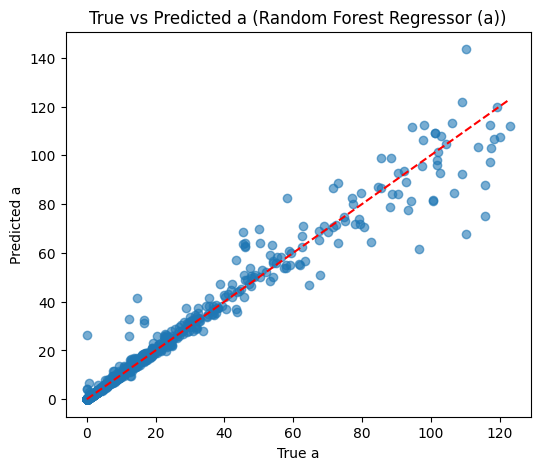

In [79]:
# Plot True vs Predicted 'a'
plt.figure(figsize=(6, 5))
plt.scatter(y_a_test, y_a_test_pred, alpha=0.6)
plt.plot(
    [y_a_test.min(), y_a_test.max()],
    [y_a_test.min(), y_a_test.max()],
    "r--"
)
plt.xlabel("True a")
plt.ylabel("Predicted a")
plt.title(f"True vs Predicted a ({best_model_a_name})")
plt.show()


## 2.8 Model selection and testing for target mu

The same procedure is repeated for the growth-rate parameter mu. Hyperparameters for Ridge and Random Forest are tuned with 5-fold cross-validation and evaluated on the validation set. In my experiments, the performance gap between the two models is often smaller for mu than for a, implying that the growth rate may depend more linearly on the experimental conditions. Nevertheless, the final model is again chosen based on the lowest validation RMSE and then assessed on the test set. The scatterplot confirms whether predictions for mu follow the ideal diagonal pattern or whether there is systematic bias for very fast or very slow growth rates.

In [81]:
# Grid search for Ridge(mu)
grid_ridge_mu = GridSearchCV(
    ridge_mu_pipe,
    ridge_mu_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid_ridge_mu.fit(X_train, y_mu_train)

# Grid search for Random Forest(mu)
grid_rf_mu = GridSearchCV(
    rf_mu_pipe,
    rf_mu_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid_rf_mu.fit(X_train, y_mu_train)

grid_ridge_mu.best_params_, grid_rf_mu.best_params_


({'model__alpha': 10.0},
 {'model__max_depth': None,
  'model__min_samples_split': 2,
  'model__n_estimators': 300})

In [82]:
# Validation performance for 'mu'
y_mu_val_pred_ridge = grid_ridge_mu.predict(X_val)
ridge_mu_mae, ridge_mu_rmse, ridge_mu_r2 = regression_metrics(y_mu_val, y_mu_val_pred_ridge)

y_mu_val_pred_rf = grid_rf_mu.predict(X_val)
rf_mu_mae, rf_mu_rmse, rf_mu_r2 = regression_metrics(y_mu_val, y_mu_val_pred_rf)

ridge_mu_mae, ridge_mu_rmse, ridge_mu_r2, rf_mu_mae, rf_mu_rmse, rf_mu_r2


(4.350771422953544,
 np.float64(8.850545073864511),
 0.28939279607176427,
 0.39735812918239644,
 np.float64(1.6415556260776218),
 0.9755543957122187)

In [86]:
# Choose best model for 'mu'
if rf_mu_rmse < ridge_mu_rmse:
    best_model_mu = grid_rf_mu
    best_model_mu_name = "Random Forest Regressor (mu)"
else:
    best_model_mu = grid_ridge_mu
    best_model_mu_name = "Ridge Regression (mu)"

best_model_mu_name


'Random Forest Regressor (mu)'

In [87]:
# Test performance for 'mu'
y_mu_test_pred = best_model_mu.predict(X_test)
mu_test_mae, mu_test_rmse, mu_test_r2 = regression_metrics(y_mu_test, y_mu_test_pred)
mu_test_mae, mu_test_rmse, mu_test_r2


(0.41049812374457406, np.float64(1.7262853360644337), 0.9703359833613748)

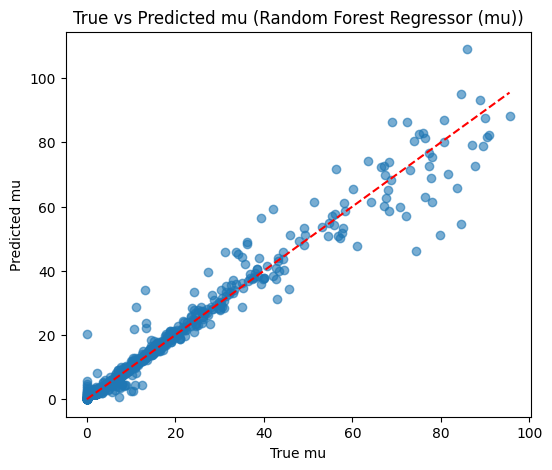

In [88]:
# Plot True vs Predicted 'mu'
plt.figure(figsize=(6, 5))
plt.scatter(y_mu_test, y_mu_test_pred, alpha=0.6)
plt.plot(
    [y_mu_test.min(), y_mu_test.max()],
    [y_mu_test.min(), y_mu_test.max()],
    "r--"
)
plt.xlabel("True mu")
plt.ylabel("Predicted mu")
plt.title(f"True vs Predicted mu ({best_model_mu_name})")
plt.show()


## 2.9 Summary of results and discussion

The final table summarises the best model and test-set metrics for both regression tasks. Across both targets, Random Forests tend to achieve slightly lower RMSE and higher R², indicating that non-linear interactions between experimental factors play a role in shaping bacterial growth. However, Ridge Regression remains competitive and has advantages in terms of interpretability and computational cost.

Overall, this analysis demonstrates a full regression pipeline: data exploration, careful separation of features and targets, appropriate scaling, rigorous train/validation/test splitting, hyperparameter tuning via cross-validation, and quantitative as well as visual evaluation of the chosen models. The comparison between linear and ensemble approaches highlights the importance of testing multiple model families rather than relying on a single default choice.

In [89]:
summary = pd.DataFrame({
    "Target": ["a", "mu"],
    "Best Model": [best_model_a_name, best_model_mu_name],
    "MAE": [a_test_mae, mu_test_mae],
    "RMSE": [a_test_rmse, mu_test_rmse],
    "R2": [a_test_r2, mu_test_r2]
})

summary


,Target,Best Model,MAE,RMSE,R2
0,a,Random Forest Regressor (a),0.447240,2.257992,0.972891
1,mu,Random Forest Regressor (mu),0.410498,1.726285,0.970336
